# pyCisTopic scATAC processing

In [ ]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

In [ ]:
!ls /bamfiles_filtered

D0.filtered.bam      Q1.filtered.bam.csi  Q3.filtered.bam
D0.filtered.bam.csi  Q2.filtered.bam	  Q3.filtered.bam.csi
Q1.filtered.bam      Q2.filtered.bam.csi


In [ ]:
!ls /fragments/

D0_corrected.tsv.gz	 Q1_corrected.tsv.gz.tbi  Q3_corrected.tsv.gz
D0_corrected.tsv.gz.tbi  Q2_corrected.tsv.gz	  Q3_corrected.tsv.gz.tbi
Q1_corrected.tsv.gz	 Q2_corrected.tsv.gz.tbi


In [ ]:
os.chdir(os.getcwd()) # change to current working directory

In [ ]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

# Get cell annotation from RNA

In [ ]:
import scanpy as sc

In [ ]:
rna = sc.read_h5ad("/2023_Cools_B-ALL/concatenated_adata_log_pca_celltypist_23012025.h5ad")

In [ ]:
rna

AnnData object with n_obs × n_vars = 11264 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'celltypist_c

In [ ]:
rna.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,outlier,...,leiden_1.25,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine
AAACAGCCAGTTTGTG-D0,D0,1891,7.545390,7641.0,8.941415,21.823060,13.584609,7.642979,0.0,False,...,3,4,2,7,39,294,B-cell lineage,0.978114,Pro-B cells,0.950723
AAACAGCCATGTTTGG-D0,D0,2319,7.749322,10986.0,9.304468,21.354451,13.899508,9.111597,0.0,False,...,7,7,8,6,73,51,B-cell lineage,0.603815,Pro-B cells,0.370262
AAACAGCCATTTAAGC-D0,D0,1667,7.419381,6636.0,8.800415,21.503918,13.803495,6.268836,0.0,False,...,3,4,2,2,24,29,B-cell lineage,0.951335,Pro-B cells,0.903238
AAACATGCATTGGGAG-D0,D0,1599,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,False,...,3,4,2,7,31,69,B-cell lineage,0.121671,Pro-B cells,0.183371
AAACCAACAATAACCT-D0,D0,1403,7.247081,5495.0,8.611775,24.913558,18.817106,5.150136,0.0,False,...,3,4,2,2,4,9,B-cell lineage,0.991872,Pro-B cells,0.996793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCGAGTAA-Q3,Q3,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,False,...,1,1,11,30,16,54,B-cell lineage,0.403587,Pro-B cells,0.973642
TTTGTGAAGCTTTGGG-Q3,Q3,2369,7.770645,8738.5,9.075608,15.860846,9.990273,4.691881,0.0,False,...,1,1,0,0,58,91,B cells,0.776546,Pro-B cells,0.532727
TTTGTGGCAGCCTGCA-Q3,Q3,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,False,...,1,1,0,0,58,91,B cells,0.484664,Pro-B cells,0.177973
TTTGTTGGTAAACAAG-Q3,Q3,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,False,...,11,11,12,23,57,20,Monocytes,0.745200,Non-classical monocytes,0.041574


In [ ]:
rna.obs.celltypist_cell_label_fine.value_counts()

Pro-B cells                  9879
Tcm/Naive helper T cells      371
CD16+ NK cells                304
Tem/Trm cytotoxic T cells     253
Classical monocytes           203
Naive B cells                 125
Non-classical monocytes        78
Mid erythroid                  51
Name: celltypist_cell_label_fine, dtype: int64

In [ ]:
rna.obs[["sample","celltypist_cell_label_fine"]].value_counts()

sample  celltypist_cell_label_fine
Q1      Pro-B cells                   4196
Q3      Pro-B cells                   2197
D0      Pro-B cells                   1813
Q2      Pro-B cells                   1673
        Tcm/Naive helper T cells       270
Q3      Tem/Trm cytotoxic T cells      244
Q2      Classical monocytes            176
D0      CD16+ NK cells                 160
Q2      CD16+ NK cells                 130
D0      Naive B cells                  103
Q3      Tcm/Naive helper T cells        58
        Non-classical monocytes         58
D0      Tcm/Naive helper T cells        39
Q2      Mid erythroid                   29
Q3      Classical monocytes             23
        Mid erythroid                   19
Q2      Naive B cells                   16
Q1      Non-classical monocytes         11
Q3      CD16+ NK cells                  11
Q2      Tem/Trm cytotoxic T cells        7
D0      Non-classical monocytes          5
Q1      Naive B cells                    4
Q2      Non-classic

/opt/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


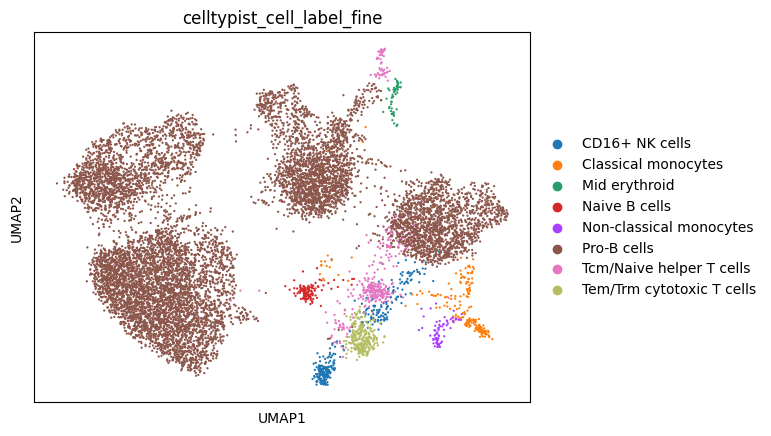

In [ ]:
sc.pl.umap(rna, color = "celltypist_cell_label_fine")

In [ ]:
rna

AnnData object with n_obs × n_vars = 11264 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'celltypist_c

In [ ]:
# removing less common cell types to avoid cistopic error
filtered_obs = rna.obs.groupby(["sample","celltypist_cell_label_fine"]).filter(lambda x: len(x) >= 10)
rna = rna[rna.obs.index.isin(filtered_obs.index)]

In [ ]:
rna

View of AnnData object with n_obs × n_vars = 11226 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'cell

In [ ]:
# the barcodes for ATAC and RNA nuclei matching 
atac_CB = pd.read_csv('/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz', header = None)
rna_CB = pd.read_csv('/barcodes/cellranger_arc_rna.737K-arc-v1.txt.gz', header = None)

In [ ]:
rna_CB.rename(columns={0: 'rna_CB'}, inplace=True)
rna_CB

,rna_CB
0,AAACAGCCAAACAACA
1,AAACAGCCAAACATAG
2,AAACAGCCAAACCCTA
3,AAACAGCCAAACCTAT
4,AAACAGCCAAACCTTG
...,...
736315,TTTGTTGGTTTGGGTA
736316,TTTGTTGGTTTGGTTC
736317,TTTGTTGGTTTGTCTA
736318,TTTGTTGGTTTGTGGA


In [ ]:
atac_CB.rename(columns={0: 'atac_CB'}, inplace=True)
atac_CB

,atac_CB
0,ACAGCGGGTGTGTTAC
1,ACAGCGGGTTGTTCTT
2,ACAGCGGGTAACAGGC
3,ACAGCGGGTGCGCGAA
4,ACAGCGGGTCCTCCAT
...,...
736315,CGTACTTCACATAGCA
736316,CGTACTTCACATGCAA
736317,CGTACTTCAGGTTGTA
736318,CGTACTTCAACCCTTG


In [ ]:
df_merged =  pd.concat([rna_CB, atac_CB], axis=1)
df_merged.head()

,rna_CB,atac_CB
0,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC
1,AAACAGCCAAACATAG,ACAGCGGGTTGTTCTT
2,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC
3,AAACAGCCAAACCTAT,ACAGCGGGTGCGCGAA
4,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT


In [ ]:
rna.obs['base_index'] = rna.obs.index.str.split('-').str[0]

/tmp/ipykernel_3656564/3635066835.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna.obs['base_index'] = rna.obs.index.str.split('-').str[0]


In [ ]:
rna.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,outlier,...,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,base_index
AAACAGCCAGTTTGTG-D0,D0,1891,7.545390,7641.0,8.941415,21.823060,13.584609,7.642979,0.0,False,...,4,2,7,39,294,B-cell lineage,0.978114,Pro-B cells,0.950723,AAACAGCCAGTTTGTG
AAACAGCCATGTTTGG-D0,D0,2319,7.749322,10986.0,9.304468,21.354451,13.899508,9.111597,0.0,False,...,7,8,6,73,51,B-cell lineage,0.603815,Pro-B cells,0.370262,AAACAGCCATGTTTGG
AAACAGCCATTTAAGC-D0,D0,1667,7.419381,6636.0,8.800415,21.503918,13.803495,6.268836,0.0,False,...,4,2,2,24,29,B-cell lineage,0.951335,Pro-B cells,0.903238,AAACAGCCATTTAAGC
AAACATGCATTGGGAG-D0,D0,1599,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,False,...,4,2,7,31,69,B-cell lineage,0.121671,Pro-B cells,0.183371,AAACATGCATTGGGAG
AAACCAACAATAACCT-D0,D0,1403,7.247081,5495.0,8.611775,24.913558,18.817106,5.150136,0.0,False,...,4,2,2,4,9,B-cell lineage,0.991872,Pro-B cells,0.996793,AAACCAACAATAACCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCGAGTAA-Q3,Q3,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,False,...,1,11,30,16,54,B-cell lineage,0.403587,Pro-B cells,0.973642,TTTGTGAAGCGAGTAA
TTTGTGAAGCTTTGGG-Q3,Q3,2369,7.770645,8738.5,9.075608,15.860846,9.990273,4.691881,0.0,False,...,1,0,0,58,91,B cells,0.776546,Pro-B cells,0.532727,TTTGTGAAGCTTTGGG
TTTGTGGCAGCCTGCA-Q3,Q3,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,False,...,1,0,0,58,91,B cells,0.484664,Pro-B cells,0.177973,TTTGTGGCAGCCTGCA
TTTGTTGGTAAACAAG-Q3,Q3,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,False,...,11,12,23,57,20,Monocytes,0.745200,Non-classical monocytes,0.041574,TTTGTTGGTAAACAAG


In [ ]:
rna.obs['sample'] 

AAACAGCCAGTTTGTG-D0    D0
AAACAGCCATGTTTGG-D0    D0
AAACAGCCATTTAAGC-D0    D0
AAACATGCATTGGGAG-D0    D0
AAACCAACAATAACCT-D0    D0
                       ..
TTTGTGAAGCGAGTAA-Q3    Q3
TTTGTGAAGCTTTGGG-Q3    Q3
TTTGTGGCAGCCTGCA-Q3    Q3
TTTGTTGGTAAACAAG-Q3    Q3
TTTGTTGGTTAAGCTG-Q3    Q3
Name: sample, Length: 11226, dtype: category
Categories (4, object): ['D0', 'Q1', 'Q2', 'Q3']

In [ ]:
rna.obs['sample'].value_counts()

Q1    4207
Q3    2610
Q2    2294
D0    2115
Name: sample, dtype: int64

In [ ]:
# mapping atac barcodes based on rna
mapping_dict = pd.Series(df_merged['atac_CB'].values, index=df_merged['rna_CB']).to_dict()
rna.obs['atac_CB'] = rna.obs['base_index'].map(mapping_dict)

In [ ]:
rna.obs['atac_CB'] = rna.obs['atac_CB'].astype(str) + '-'+ rna.obs['sample'].astype(str)
rna.obs['atac_CB']

AAACAGCCAGTTTGTG-D0    ACAGCGGGTGTTACTA-D0
AAACAGCCATGTTTGG-D0    ACAGCGGGTTTATCCT-D0
AAACAGCCATTTAAGC-D0    ACAGCGGGTTCACTTT-D0
AAACATGCATTGGGAG-D0    CATTTAGGTGTCCACA-D0
AAACCAACAATAACCT-D0    CTTTATCGTCGAGGCA-D0
                              ...         
TTTGTGAAGCGAGTAA-Q3    GTAGGTGTCGGTCCAT-Q3
TTTGTGAAGCTTTGGG-Q3    GTAGGTGTCCCAATAT-Q3
TTTGTGGCAGCCTGCA-Q3    GTTTGGTGTTTCTAAG-Q3
TTTGTTGGTAAACAAG-Q3    CGTACTTCAAATATGC-Q3
TTTGTTGGTTAAGCTG-Q3    CGTACTTCATGATGAT-Q3
Name: atac_CB, Length: 11226, dtype: object

In [ ]:
rna_cell_type = rna.obs[['atac_CB','celltypist_cell_label_fine']] # subset to keep info on atac cb and cell type only

In [ ]:
rna_cell_type

,atac_CB,celltypist_cell_label_fine
AAACAGCCAGTTTGTG-D0,ACAGCGGGTGTTACTA-D0,Pro-B cells
AAACAGCCATGTTTGG-D0,ACAGCGGGTTTATCCT-D0,Pro-B cells
AAACAGCCATTTAAGC-D0,ACAGCGGGTTCACTTT-D0,Pro-B cells
AAACATGCATTGGGAG-D0,CATTTAGGTGTCCACA-D0,Pro-B cells
AAACCAACAATAACCT-D0,CTTTATCGTCGAGGCA-D0,Pro-B cells
...,...,...
TTTGTGAAGCGAGTAA-Q3,GTAGGTGTCGGTCCAT-Q3,Pro-B cells
TTTGTGAAGCTTTGGG-Q3,GTAGGTGTCCCAATAT-Q3,Pro-B cells
TTTGTGGCAGCCTGCA-Q3,GTTTGGTGTTTCTAAG-Q3,Pro-B cells
TTTGTTGGTAAACAAG-Q3,CGTACTTCAAATATGC-Q3,Non-classical monocytes


In [ ]:
# replace + signs with pos and white spaces with underscore
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('/','_')
rna_cell_type['celltypist_cell_label_fine'].value_counts()

/tmp/ipykernel_3656564/2305620188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
/tmp/ipykernel_3656564/2305620188.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
/tmp/ipykernel_3656564/2305620188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Pro-B_cells                  9879
Tcm_Naive_helper_T_cells      367
CD16pos_NK_cells              301
Tem_Trm_cytotoxic_T_cells     244
Classical_monocytes           199
Naive_B_cells                 119
Non-classical_monocytes        69
Mid_erythroid                  48
Name: celltypist_cell_label_fine, dtype: int64

In [ ]:
rna_cell_type = rna_cell_type.set_index('atac_CB')
rna_cell_type = rna_cell_type.rename(columns={'celltypist_cell_label_fine': 'cell_type'})

In [ ]:
rna_cell_type

,cell_type
atac_CB,
ACAGCGGGTGTTACTA-D0,Pro-B_cells
ACAGCGGGTTTATCCT-D0,Pro-B_cells
ACAGCGGGTTCACTTT-D0,Pro-B_cells
CATTTAGGTGTCCACA-D0,Pro-B_cells
CTTTATCGTCGAGGCA-D0,Pro-B_cells
...,...
GTAGGTGTCGGTCCAT-Q3,Pro-B_cells
GTAGGTGTCCCAATAT-Q3,Pro-B_cells
GTTTGGTGTTTCTAAG-Q3,Pro-B_cells


In [ ]:
rna_cell_type["sample_id"] = rna_cell_type.index.str.split('-').str[1]

In [ ]:
rna_cell_type.loc[rna_cell_type['cell_type'] == 'Pro-B_cells', 'cell_type'] = rna_cell_type['cell_type'] + '_'+ rna_cell_type['sample_id'].astype(str)

In [ ]:
rna_cell_type['cell_type'].value_counts()

Pro-B_cells_Q1               4196
Pro-B_cells_Q3               2197
Pro-B_cells_D0               1813
Pro-B_cells_Q2               1673
Tcm_Naive_helper_T_cells      367
CD16pos_NK_cells              301
Tem_Trm_cytotoxic_T_cells     244
Classical_monocytes           199
Naive_B_cells                 119
Non-classical_monocytes        69
Mid_erythroid                  48
Name: cell_type, dtype: int64

# Get pseudobulks

In [ ]:
fragments_dict = {
    "D0":"fragments/D0_corrected.tsv.gz",
    "Q1": "fragments/Q1_corrected.tsv.gz",
    "Q2":"fragments/Q2_corrected.tsv.gz",
    "Q3":"fragments/Q3_corrected.tsv.gz"
}

In [ ]:
chromsizes = pd.read_table(
    "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes",
    header = None,
    names = ["Chromosome", "End"]
)
chromsizes.insert(1, "Start", 0)
chromsizes.head()

,Chromosome,Start,End
0,chr1,0,248956422
1,chr2,0,242193529
2,chr3,0,198295559
3,chr4,0,190214555
4,chr5,0,181538259


In [ ]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
os.makedirs(os.path.join(out_dir, "consensus_peak_calling"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"), exist_ok = True)


bw_paths, bed_paths = export_pseudobulk(
    input_data = rna_cell_type,
    variable = "cell_type",
    sample_id_col = "sample_id",
    chromsizes = chromsizes,
    bed_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"),
    bigwig_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"),
    path_to_fragments = fragments_dict,
    n_cpu = 20,
    normalize_bigwig = True,
    temp_dir = "/tmp",
    split_pattern = "-"
)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-08 16:57:26,826	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


2025-04-08 16:57:27,175 cisTopic     INFO     Splitting fragments by cell type.
2025-04-08 16:58:32,572 cisTopic     INFO     generating bigwig files


In [ ]:
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv"), "wt") as f:
    for v in bw_paths:
        _ = f.write(f"{v}\t{bw_paths[v]}\n")

In [ ]:
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv"), "wt") as f:
    for v in bed_paths:
        _ = f.write(f"{v}\t{bed_paths[v]}\n")

# Inferring the consensus peaks

In [ ]:
bw_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bw_paths.update({v: p})
        
# bw_paths = {key.replace(' ', '_'): value for key, value in bw_paths.items()} # remove white spaces in cell type names to avoid issues with MACS

In [ ]:
bed_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bed_paths.update({v: p})

# bed_paths = {key.replace(' ', '_'): value for key, value in bed_paths.items()} # remove white spaces in cell type names to avoid issues with MACS

In [ ]:
bed_paths

{'Pro-B_cells_D0': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_D0.fragments.tsv.gz',
 'Naive_B_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Naive_B_cells.fragments.tsv.gz',
 'CD16pos_NK_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/CD16pos_NK_cells.fragments.tsv.gz',
 'Tcm_Naive_helper_T_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Tcm_Naive_helper_T_cells.fragments.tsv.gz',
 'Pro-B_cells_Q1': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q1.fragments.tsv.gz',
 'Non-classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Non-classical_monocytes.fragments.tsv.gz',
 'Classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Classical_monocytes.fragments.tsv.gz',
 'Pro-B_cells_Q2': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q2.fragments.tsv.gz',
 'Mid_erythroid': 'outs/consensus_peak_calling/pseudobulk_bed_files/Mid_erythroid.fragments.tsv.gz',
 'Pro-B_cells_Q3': 'outs/

In [ ]:
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(os.path.join(out_dir, "consensus_peak_calling/MACS")),
    genome_size = 'hs',
    n_cpu = 20,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/ray_spill'
)

2025-04-08 17:00:20,584	INFO worker.py:1724 -- Started a local Ray instance.


(macs_call_peak_ray pid=3663421) 2025-04-08 17:00:23,202 cisTopic     INFO     Calling peaks for Non-classical_monocytes with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Non-classical_monocytes.fragments.tsv.gz --name Non-classical_monocytes  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=3663410) 2025-04-08 17:00:23,253 cisTopic     INFO     Calling peaks for Mid_erythroid with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Mid_erythroid.fragments.tsv.gz --name Mid_erythroid  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=3663422) 2025-04-08 17:00:23,249 cisTopic     INFO     Calling peaks for Classical_monocytes with macs2 callpeak --treatment outs/consensus_

In [ ]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks
# Other param
peak_half_width=250
path_to_blacklist="/regions/hg38-blacklist.v2.bed"
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

2025-04-08 17:02:56,390 cisTopic     INFO     Extending and merging peaks per class


/opt/venv/lib/python3.11/site-packages/pyranges/methods/intersection.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  scdf.loc[:, "Start"] = new_starts
/opt/venv/lib/python3.11/site-packages/pyranges/methods/intersection.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  scdf.loc[:, "End"] = new_ends
/opt/venv/lib/python3.11/site-packages/pyranges/methods/intersection.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use 

2025-04-08 17:03:27,627 cisTopic     INFO     Normalizing peak scores
2025-04-08 17:03:27,860 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2025-04-08 17:04:02,399 cisTopic     INFO     Done!


In [ ]:
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passin

# QC

In [ ]:
!pycistopic tss gene_annotation_list --server http://may2024.archive.ensembl.org/ | grep Human

hsapiens_gene_ensembl	Human genes (GRCh38.p14)


In [ ]:
!mkdir -p outs/qc
!pycistopic tss get_tss \
    --output outs/qc/tss.bed \
    --name "hsapiens_gene_ensembl" \
    --to-chrom-source ucsc \
    --server http://may2024.archive.ensembl.org/ \
    --ucsc hg38

- Get TSS annotation from Ensembl BioMart with the following settings:
  - biomart_name: "hsapiens_gene_ensembl"
  - biomart_host: "http://may2024.archive.ensembl.org/"
  - transcript_type: ['protein_coding']
  - use_cache: True
- Getting chromosome sizes and alias mapping for "hg38" from UCSC.
- Update chromosome names in TSS annotation to "ucsc" chromosome names.
- Writing TSS annotation BED file to "outs/qc/tss.bed".


In [ ]:
!head outs/qc/tss.bed | column -t

/bin/bash: line 1: column: command not found
head: write error: Broken pipe


In [ ]:
regions_bed_filename = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
tss_bed_filename = os.path.join(out_dir, "qc", "tss.bed")

pycistopic_qc_commands_filename = "pycistopic_qc_commands.sh"

# Create text file with all pycistopic qc command lines.
with open(pycistopic_qc_commands_filename, "w") as fh:
    for sample, fragment_filename in fragments_dict.items():
        print(
            "pycistopic qc",
            f"--fragments {fragment_filename}",
            f"--regions {regions_bed_filename}",
            f"--tss {tss_bed_filename}",
            f'--output {os.path.join(out_dir, "qc")}/{sample}',
            sep=" ",
            file=fh,
        )

In [ ]:
!cat pycistopic_qc_commands.sh

pycistopic qc --fragments fragments/D0_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/D0
pycistopic qc --fragments fragments/Q1_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/Q1
pycistopic qc --fragments fragments/Q2_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/Q2
pycistopic qc --fragments fragments/Q3_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/Q3


**In command line**
```
chmod u+x pycistopic_qc_commands.sh
pycistopic_qc_commands.sh
```

In [ ]:
from pycisTopic.plotting.qc_plot import plot_sample_stats, plot_barcode_stats
import matplotlib.pyplot as plt

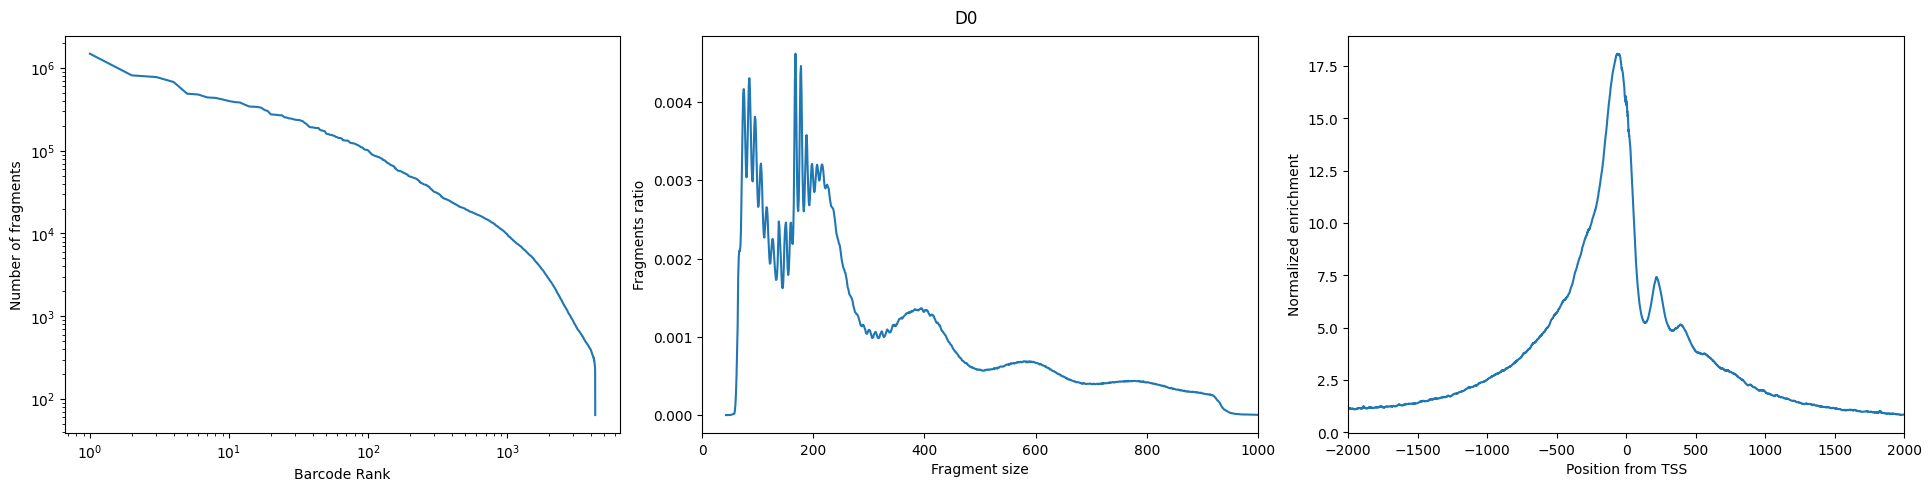

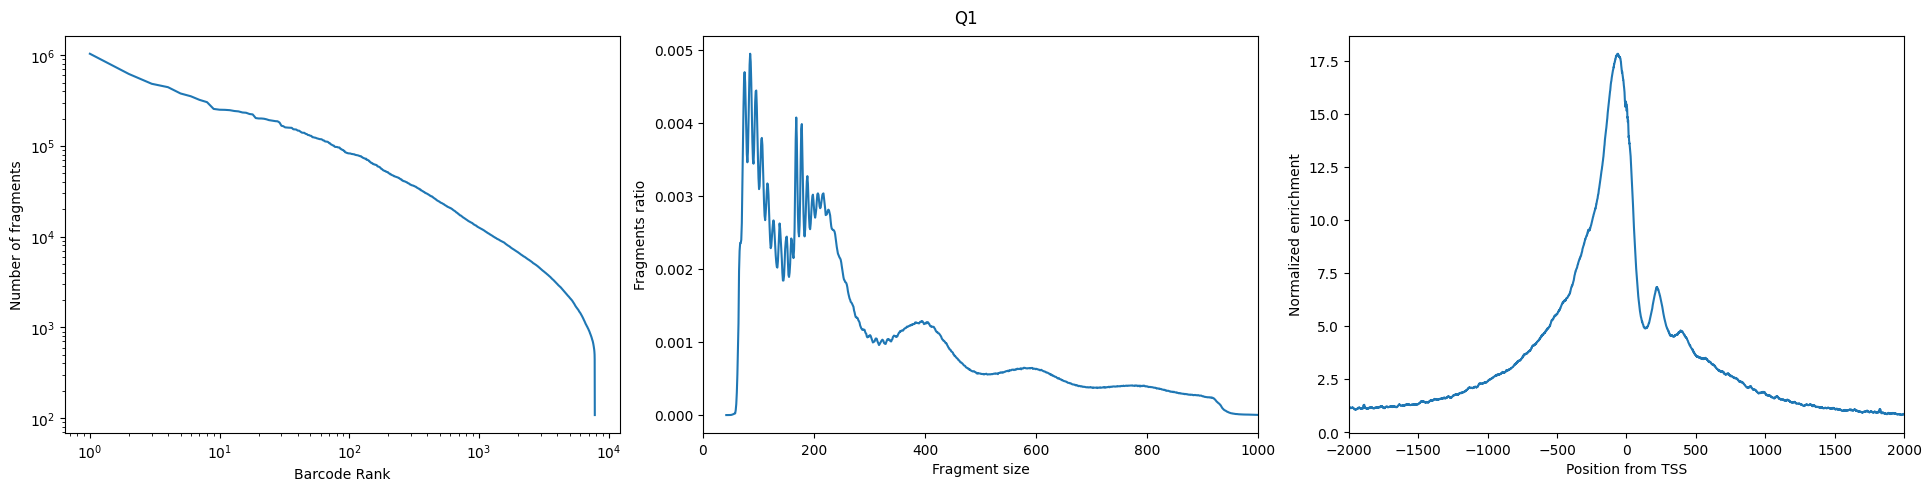

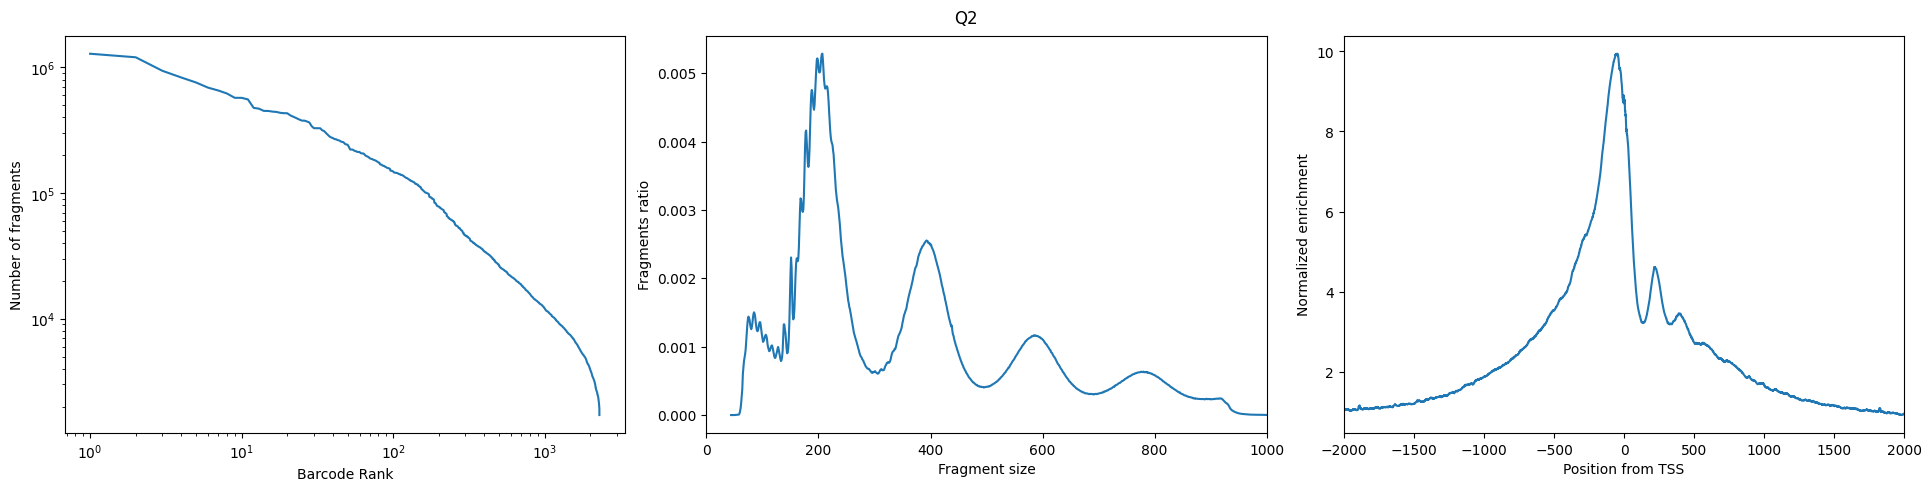

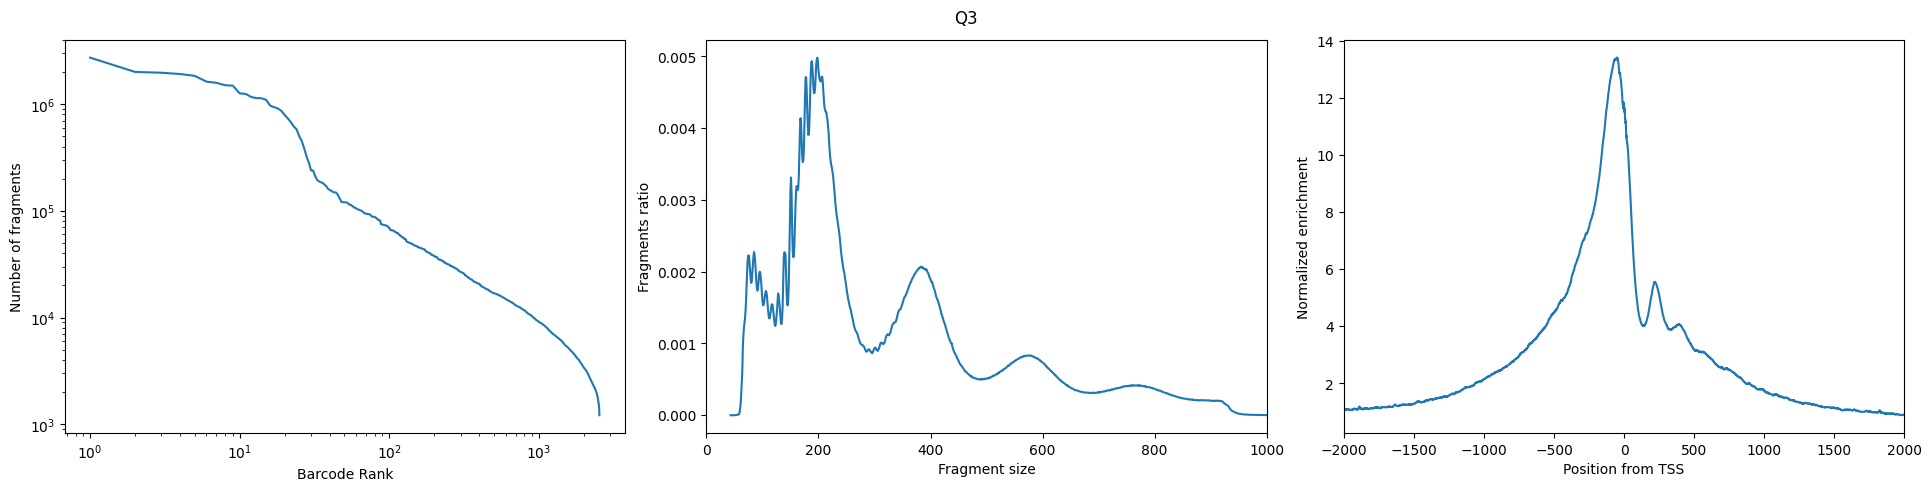

In [ ]:
for sample_id in fragments_dict:
    fig = plot_sample_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc"
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig) 

In [ ]:
from pycisTopic.qc import get_barcodes_passing_qc_for_sample
sample_id_to_barcodes_passing_filters = {}
sample_id_to_thresholds = {}
for sample_id in fragments_dict:
    (
        sample_id_to_barcodes_passing_filters[sample_id],
        sample_id_to_thresholds[sample_id]
    ) = get_barcodes_passing_qc_for_sample(
            sample_id = sample_id,
            pycistopic_qc_output_dir = "outs/qc",
            unique_fragments_threshold = 1000, # use automatic thresholding when you specify None
            tss_enrichment_threshold = 10, # use automatic thresholding
            frip_threshold = 0,
            use_automatic_thresholds = True,
    )

D0:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q1:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q2:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q3:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10


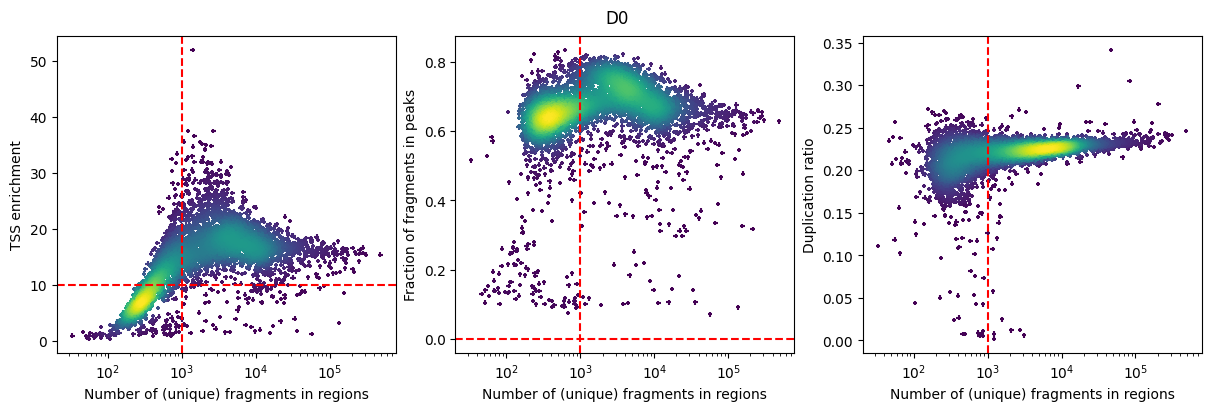

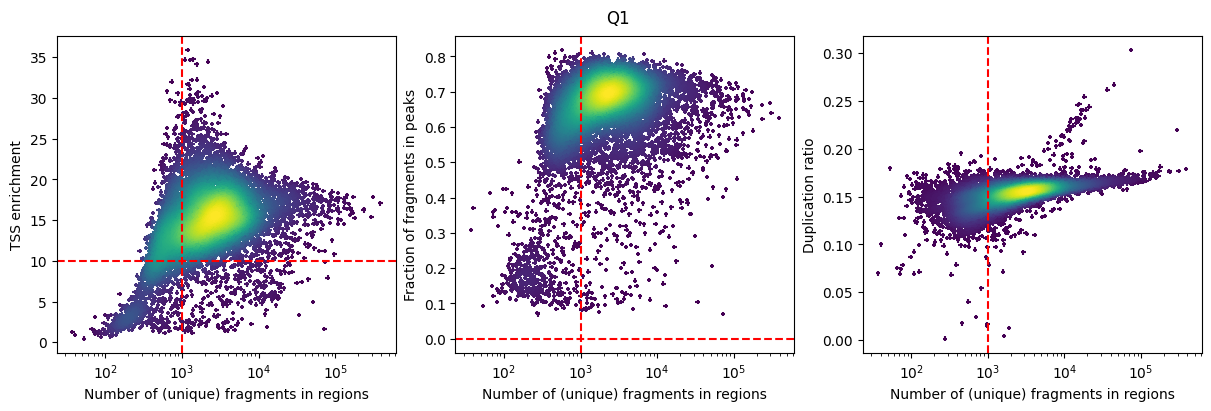

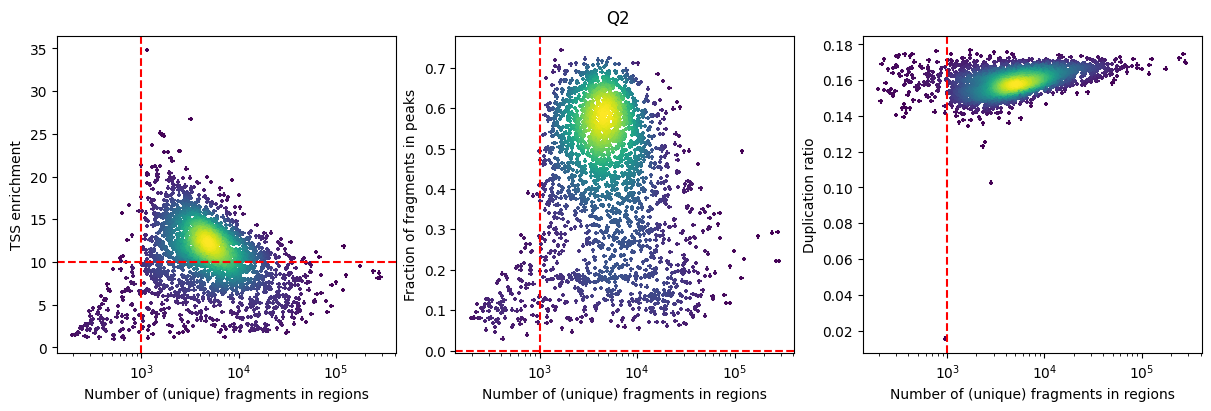

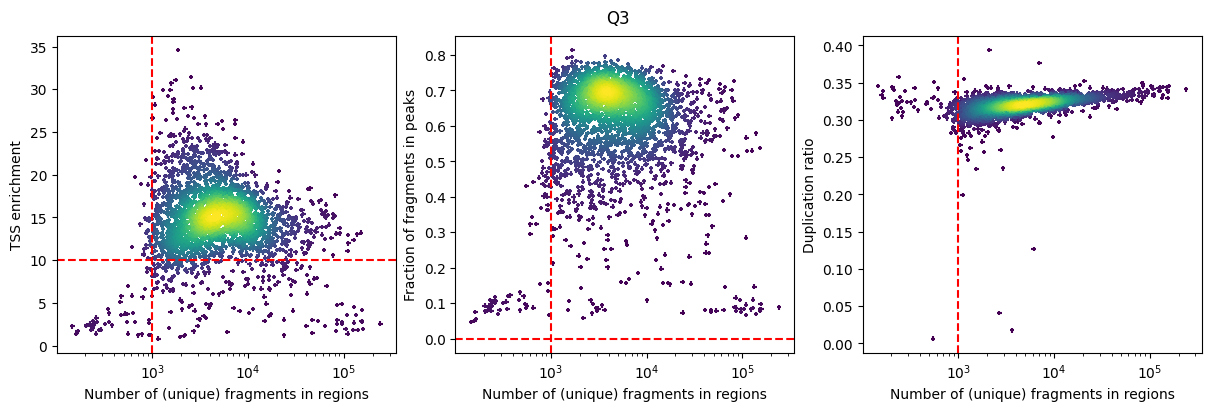

In [ ]:
for sample_id in fragments_dict:
    fig = plot_barcode_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc",
        bc_passing_filters = sample_id_to_barcodes_passing_filters[sample_id],
        detailed_title = False,
        **sample_id_to_thresholds[sample_id] 
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_cell_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig)

# Creating a cisTopic object

In [ ]:
path_to_regions = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
path_to_blacklist="/regions/hg38-blacklist.v2.bed"
pycistopic_qc_output_dir = "outs/qc"

from pycisTopic.cistopic_class import create_cistopic_object_from_fragments
import polars as pl

cistopic_obj_list = []
for sample_id in fragments_dict:
    sample_metrics = pl.read_parquet(
        os.path.join(pycistopic_qc_output_dir, f'{sample_id}.fragments_stats_per_cb.parquet')
    ).to_pandas().set_index("CB").loc[ sample_id_to_barcodes_passing_filters[sample_id] ]
    cistopic_obj = create_cistopic_object_from_fragments(
        path_to_fragments = fragments_dict[sample_id],
        path_to_regions = path_to_regions,
        path_to_blacklist = path_to_blacklist,
        metrics = sample_metrics,
        valid_bc = sample_id_to_barcodes_passing_filters[sample_id],
        n_cpu = 5,
        project = sample_id,
        split_pattern = '-'
    )
    cistopic_obj_list.append(cistopic_obj)

2025-04-08 17:12:06,740 cisTopic     INFO     Reading data for D0
2025-04-08 17:12:29,284 cisTopic     INFO     metrics provided!
2025-04-08 17:12:31,680 cisTopic     INFO     Counting fragments in regions


2025-04-08 17:12:34,840	INFO worker.py:1724 -- Started a local Ray instance.


2025-04-08 17:12:45,361 cisTopic     INFO     Creating fragment matrix
2025-04-08 17:12:55,979 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-04-08 17:12:58,367 cisTopic     INFO     Removing blacklisted regions
2025-04-08 17:12:58,976 cisTopic     INFO     Creating CistopicObject
2025-04-08 17:12:59,559 cisTopic     INFO     Done!
2025-04-08 17:12:59,610 cisTopic     INFO     Reading data for Q1
2025-04-08 17:13:28,419 cisTopic     INFO     metrics provided!
2025-04-08 17:13:30,830 cisTopic     INFO     Counting fragments in regions


2025-04-08 17:13:34,025	INFO worker.py:1724 -- Started a local Ray instance.


2025-04-08 17:13:46,810 cisTopic     INFO     Creating fragment matrix
2025-04-08 17:14:04,459 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-04-08 17:14:09,239 cisTopic     INFO     Removing blacklisted regions
2025-04-08 17:14:09,867 cisTopic     INFO     Creating CistopicObject
2025-04-08 17:14:10,582 cisTopic     INFO     Done!
2025-04-08 17:14:10,656 cisTopic     INFO     Reading data for Q2
2025-04-08 17:14:40,834 cisTopic     INFO     metrics provided!
2025-04-08 17:14:42,980 cisTopic     INFO     Counting fragments in regions


2025-04-08 17:14:46,212	INFO worker.py:1724 -- Started a local Ray instance.


2025-04-08 17:14:50,825 cisTopic     INFO     Creating fragment matrix
2025-04-08 17:14:54,538 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-04-08 17:14:55,746 cisTopic     INFO     Removing blacklisted regions
2025-04-08 17:14:56,313 cisTopic     INFO     Creating CistopicObject
2025-04-08 17:14:56,543 cisTopic     INFO     Done!
2025-04-08 17:14:56,575 cisTopic     INFO     Reading data for Q3
2025-04-08 17:15:23,155 cisTopic     INFO     metrics provided!
2025-04-08 17:15:25,123 cisTopic     INFO     Counting fragments in regions


2025-04-08 17:15:28,351	INFO worker.py:1724 -- Started a local Ray instance.


2025-04-08 17:15:35,587 cisTopic     INFO     Creating fragment matrix
2025-04-08 17:15:43,384 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-04-08 17:15:45,413 cisTopic     INFO     Removing blacklisted regions
2025-04-08 17:15:45,991 cisTopic     INFO     Creating CistopicObject
2025-04-08 17:15:46,323 cisTopic     INFO     Done!


In [ ]:
cistopic_obj = cistopic_obj_list[0]
print(cistopic_obj)

CistopicObject from project D0 with n_cells × n_regions = 2398 × 222777


In [ ]:
from pycisTopic.cistopic_class import merge
cistopic_obj = merge(cistopic_obj_list)

2025-04-08 17:15:48,190 cisTopic     INFO     cisTopic object 1 merged
2025-04-08 17:15:50,311 cisTopic     INFO     cisTopic object 2 merged
2025-04-08 17:15:52,856 cisTopic     INFO     cisTopic object 3 merged


In [ ]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Add metadata to cistopic object

In [ ]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,unique_fragments_in_peaks_count,log10_unique_fragments_in_peaks_count,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode
CTCACCACACTAATCC-D0___D0,122028,5.086459,60243,4.779907,D0,48,228811,5.359479,173269,5.238723,...,112191,5.049962,0.647496,55542,0.242742,15.833652,0.006128,0.360433,1.066572,CTCACCACACTAATCC
GTCTAGCTCCAGGATG-D0___D0,4431,3.646502,3967,3.598462,D0,1403,7554,3.878234,5805,3.763877,...,4112,3.614159,0.708355,1749,0.231533,20.061720,0.040761,2.916648,13.586348,GTCTAGCTCCAGGATG
CTAATGTTCTTTGGGC-D0___D0,46460,4.667079,30337,4.481973,D0,144,87837,4.943682,68021,4.832649,...,42689,4.630326,0.627586,19816,0.225600,14.099705,0.007757,0.498514,3.295278,CTAATGTTCTTTGGGC
CTAGGATAGTGGCTTC-D0___D0,176098,5.245754,75679,4.878975,D0,21,363011,5.559921,273397,5.436795,...,161176,5.207303,0.589531,89614,0.246863,12.959083,0.001893,0.084456,0.497682,CTAGGATAGTGGCTTC
TCCTCAAAGGCCTAAG-D0___D0,78871,4.896917,43884,4.642306,D0,88,144902,5.161077,111302,5.046507,...,72652,4.861254,0.652747,33600,0.231881,16.636220,0.008855,0.492707,2.800991,TCCTCAAAGGCCTAAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCAATTGTAGGTGAC-Q3___Q3,1793,3.25358,1594,3.202488,Q3,2244,3761,3.575419,2542,3.405346,...,1634,3.213518,0.642801,1219,0.324116,15.360008,0.050653,2.489732,15.067269,GCCAATTGTAGGTGAC
GAGGGTGAGGTATGGT-Q3___Q3,1324,3.121888,1213,3.083861,Q3,2478,2643,3.422261,1766,3.247237,...,1225,3.088490,0.693658,877,0.331820,15.620820,0.032544,1.625805,3.331083,GAGGGTGAGGTATGGT
GCATTGTGTGGTGAAC-Q3___Q3,1212,3.083503,1065,3.02735,Q3,2419,2946,3.469380,2024,3.306425,...,1116,3.048053,0.551383,922,0.312967,12.181820,0.034797,0.858024,10.392708,GCATTGTGTGGTGAAC
TGGACCAAGGTTGTAA-Q3___Q3,1788,3.252368,1617,3.20871,Q3,2350,3268,3.514415,2222,3.346939,...,1641,3.215373,0.738524,1046,0.320073,18.044076,0.033143,1.802330,19.262841,TGGACCAAGGTTGTAA


In [ ]:
import pandas as pd

cistopic_obj.add_cell_data(rna_cell_type) # use data from rna for cell type
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

Columns ['sample_id'] will be overwritten


In [ ]:
cistopic_obj.cell_data


,log10_total_fragments_count,pdf_values_for_tss_enrichment,cisTopic_log_nr_acc,cisTopic_nr_acc,barcode_rank,log10_unique_fragments_count,total_fragments_in_peaks_count,cisTopic_nr_frag,unique_fragments_in_peaks_count,log10_unique_fragments_in_peaks_count,...,cisTopic_log_nr_frag,pdf_values_for_duplication_ratio,log10_total_fragments_in_peaks_count,duplication_count,pdf_values_for_fraction_of_fragments_in_peaks,unique_fragments_count,fraction_of_fragments_in_peaks,barcode,cell_type,sample_id
CTCACCACACTAATCC-D0___D0,5.359479,0.006128,4.779907,60243,48,5.238723,148120,122028,112191,5.049962,...,5.086459,1.066572,5.170617,55542,0.360433,173269,0.647496,CTCACCACACTAATCC,NaN,NaN
GTCTAGCTCCAGGATG-D0___D0,3.878234,0.040761,3.598462,3967,1403,3.763877,5399,4431,4112,3.614159,...,3.646502,13.586348,3.732394,1749,2.916648,5805,0.708355,GTCTAGCTCCAGGATG,Naive_B_cells,D0
CTAATGTTCTTTGGGC-D0___D0,4.943682,0.007757,4.481973,30337,144,4.832649,55112,46460,42689,4.630326,...,4.667079,3.295278,4.741254,19816,0.498514,68021,0.627586,CTAATGTTCTTTGGGC,Pro-B_cells_D0,D0
CTAGGATAGTGGCTTC-D0___D0,5.559921,0.001893,4.878975,75679,21,5.436795,215174,176098,161176,5.207303,...,5.245754,0.497682,5.332792,89614,0.084456,273397,0.589531,CTAGGATAGTGGCTTC,NaN,NaN
TCCTCAAAGGCCTAAG-D0___D0,5.161077,0.008855,4.642306,43884,88,5.046507,94715,78871,72652,4.861254,...,4.896917,2.800991,4.976423,33600,0.492707,111302,0.652747,TCCTCAAAGGCCTAAG,Pro-B_cells_D0,D0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCAATTGTAGGTGAC-Q3___Q3,3.575419,0.050653,3.202488,1594,2244,3.405346,2457,1793,1634,3.213518,...,3.25358,15.067269,3.390582,1219,2.489732,2542,0.642801,GCCAATTGTAGGTGAC,Pro-B_cells_Q3,Q3
GAGGGTGAGGTATGGT-Q3___Q3,3.422261,0.032544,3.083861,1213,2478,3.247237,1851,1324,1225,3.088490,...,3.121888,3.331083,3.267641,877,1.625805,1766,0.693658,GAGGGTGAGGTATGGT,Pro-B_cells_Q3,Q3
GCATTGTGTGGTGAAC-Q3___Q3,3.469380,0.034797,3.02735,1065,2419,3.306425,1654,1212,1116,3.048053,...,3.083503,10.392708,3.218798,922,0.858024,2024,0.551383,GCATTGTGTGGTGAAC,Pro-B_cells_Q3,Q3
TGGACCAAGGTTGTAA-Q3___Q3,3.514415,0.033143,3.20871,1617,2350,3.346939,2421,1788,1641,3.215373,...,3.252368,19.262841,3.384174,1046,1.802330,2222,0.738524,TGGACCAAGGTTGTAA,Pro-B_cells_Q3,Q3


In [ ]:
cistopic_obj.cell_data.cell_type.value_counts()

Pro-B_cells_Q1               3204
Pro-B_cells_Q3               1681
Pro-B_cells_D0               1572
Pro-B_cells_Q2                933
CD16pos_NK_cells              239
Tcm_Naive_helper_T_cells      225
Tem_Trm_cytotoxic_T_cells     211
Classical_monocytes           138
Naive_B_cells                  98
Non-classical_monocytes        61
Mid_erythroid                   9
Name: cell_type, dtype: int64

# CisTopic running

This is better submitted as a job to cluster, since it is a resource heavy process that takes time (±10 hours)

In [ ]:
!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
!tar -xf Mallet-202108-bin.tar.gz

In [2]:
! cat 03b_pycistopic_modelling.py

import pycisTopic
import pandas as pd
import pickle
import os

os.chdir(os.getcwd())

out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

file_path = "/outs/cistopic_obj.pkl"
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)

print(cistopic_obj)


os.environ['MALLET_MEMORY'] = '250G' # adjust accordingly
from pycisTopic.lda_models import run_cgs_models_mallet
# Configure path Mallet
mallet_path="Mallet-202108/bin/mallet"
# Run models
models=run_cgs_models_mallet(
    cistopic_obj,
    n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    n_cpu=30,
    n_iter=500,
    random_state=555,
    alpha=50,
    alpha_by_topic=True,
    eta=0.1,
    eta_by_topic=False,
    tmp_path="/ray_spill/mallet/tutorial",
    save_path="/ray_spill/mallet/tutorial",
    mallet_path=mallet_path,
)

pickle.dump(
    models,
    open(os.path.join(out_dir, "models.pkl"), "wb")
)


In [1]:
!cat 03a_pycistopic_modelling.slurm 

#!/usr/bin/env bash
#SBATCH -n 1
#SBATCH -c 30
#SBATCH -A account
#SBATCH -p partition
#SBATCH --mem 270G
#SBATCH --time=10:00:00
#SBATCH --job-name="cistopic_modelling"
#SBATCH --output=logs/R-%x.%j.out
#SBATCH --error=logs/R-%x.%j.err

# script to run cistopic modelling

apptainer run -B /data,$VSC_SCRATCH,/lustre1/,/staging \
pycistopic_2.0a.sif python /atac/03b_pycistopic_modelling.py


In [ ]:
!mkdir -p /ray_spill/mallet/tutorial/

and I submitted 03a_pycistopic_modelling.slurm  as a slurm job 
```
sbatch 03a_pycistopic_modelling.slurm
```

In [ ]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     